In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

data_path = "Resources/COVID_final_data.csv"


data = pd.read_csv(data_path)

data.head()

,Unnamed: 0,Country,Country Code,Cases,Deaths,Deaths per 1000 Cases,Population 2019,"Cases per 100,000 People","Deaths per 100,000 People",2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions,Capital,Latitude,Longitude
0,0,Afghanistan,AFG,39616,1470,37.11,38041757.0,104.14,3.86,20.191760,19.484385,19.101354,Kabul,34.5167,69.1833
1,1,Albania,ALB,14730,407,27.63,2862427.0,514.60,14.22,13.019693,15.147021,15.278077,Tirana,41.3275,19.8189
2,2,Algeria,DZA,52520,1779,33.87,43053054.0,121.99,4.13,167.000000,174.000000,170.000000,Algiers,36.7631,3.0506
3,3,Andorra,AND,2568,53,20.64,76177.0,3371.10,69.57,3.000181,3.218316,3.154058,Andorra la Vella,42.5,1.5165
4,4,Angola,AGO,5725,211,36.86,31825299.0,17.99,0.66,122.000000,101.000000,94.635416,Luanda,-8.8383,13.2344


In [2]:
subset = data[['Country', 'Cases', 'Deaths', 'Deaths per 1000 Cases', 'Population 2019', 'Latitude']]
subset.head()

,Country,Cases,Deaths,Deaths per 1000 Cases,Population 2019,Latitude
0,Afghanistan,39616,1470,37.11,38041757.0,34.5167
1,Albania,14730,407,27.63,2862427.0,41.3275
2,Algeria,52520,1779,33.87,43053054.0,36.7631
3,Andorra,2568,53,20.64,76177.0,42.5
4,Angola,5725,211,36.86,31825299.0,-8.8383


In [3]:
bins = [0, 109999, 799999, 2399999, 4949999, 8499999, 11499999, 18999999, 34999999, 79999999, 1500000000]
pop_ranges = ['<110k', '110k-799k','800k-2.39m', '2.4m-4.94m', '4.95m-8.49m', '8.5m-11.49m', '11.5m-18.9m', '20m-34.9m', '35m-79.9m', '70m-1.5b']
subset['Population Range'] = pd.cut(subset['Population 2019'], bins, labels=pop_ranges, include_lowest=True)
subset.head()

C:\Users\Adam\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Cases,Deaths,Deaths per 1000 Cases,Population 2019,Latitude,Population Range
0,Afghanistan,39616,1470,37.11,38041757.0,34.5167,35m-79.9m
1,Albania,14730,407,27.63,2862427.0,41.3275,2.4m-4.94m
2,Algeria,52520,1779,33.87,43053054.0,36.7631,35m-79.9m
3,Andorra,2568,53,20.64,76177.0,42.5,<110k
4,Angola,5725,211,36.86,31825299.0,-8.8383,20m-34.9m


In [4]:
subset = subset.loc[subset['Latitude'] != 'Not Available']
subset['Latitude'].astype(float)


0      34.5167
1      41.3275
2      36.7631
3      42.5000
4      -8.8383
        ...   
194    10.5010
195    21.0333
196    15.3547
197   -15.4166
198   -17.8178
Name: Latitude, Length: 185, dtype: float64

In [5]:
pop_range = '70m-1.5b'

group = subset.loc[(subset['Population Range'] == f'{pop_range}')]
group_lat = group['Latitude'].sort_values()
group_lat_abs = group['Latitude'].apply(lambda x: float(x)).abs()

group_cases = group['Cases']
group_deaths = group['Deaths']
group_dp1k = group['Deaths per 1000 Cases']

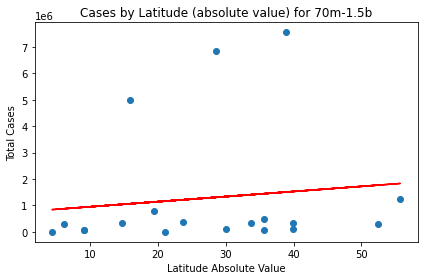

r-squared : 0.02
Correlation Coefficient : 0.12
-------------------------------------------------------


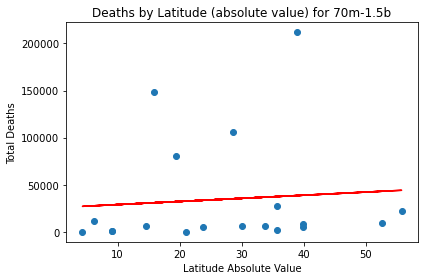

r-squared : 0.01
Correlation Coefficient : 0.08
-------------------------------------------------------


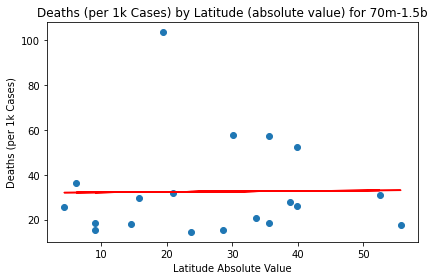

r-squared : 0.0
Correlation Coefficient : 0.01


In [16]:
# pop_range = '70m-1.5b'

# group = subset.loc[(subset['Population Range'] == f'{pop_range}')]
# group_lat = group['Latitude'].sort_values()
# group_lat_abs = group['Latitude'].apply(lambda x: float(x)).abs()

# group_cases = group['Cases']
# group_deaths = group['Deaths']
# group_dp1k = group['Deaths per 1000 Cases']



# plt.scatter(group_lat_abs, group_cases)
# plt.xlabel('Latitude Absolute Value')
# plt.ylabel('Total Cases')
# plt.title(f'Cases by Latitude (absolute value) for {pop_range}')


# slope, intercept, r, p, std_err = st.linregress(group_lat_abs, group_cases)
# fit = slope * group_lat_abs + intercept
# plt.plot(group_lat_abs,fit,color='r')

# plt.tight_layout()
# plt.show()

# print(f"r-squared : {(round(r**2,2))}")
# print(f"Correlation Coefficient : {round(st.pearsonr(group_lat_abs,group_cases)[0],2)}")
# print('-------------------------------------------------------')
# #-------------------------------------------------------------------------------------------------------------------------

# plt.scatter(group_lat_abs, group_deaths)
# plt.xlabel('Latitude Absolute Value')
# plt.ylabel('Total Deaths')
# plt.title(f'Deaths by Latitude (absolute value) for {pop_range}')


# slope, intercept, r, p, std_err = st.linregress(group_lat_abs, group_deaths)
# fit = slope * group_lat_abs + intercept
# plt.plot(group_lat_abs,fit,color='r')


# plt.tight_layout()
# plt.show()

# print(f"r-squared : {(round(r**2,2))}")
# print(f"Correlation Coefficient : {round(st.pearsonr(group_lat_abs,group_deaths)[0],2)}")
# print('-------------------------------------------------------')
# #-------------------------------------------------------------------------------------------------------------------------

# plt.scatter(group_lat_abs, group_dp1k)
# plt.xlabel('Latitude Absolute Value')
# plt.ylabel('Deaths (per 1k Cases)')
# plt.title(f'Deaths (per 1k Cases) by Latitude (absolute value) for {pop_range}')


# slope, intercept, r, p, std_err = st.linregress(group_lat_abs, group_dp1k)
# fit = slope * group_lat_abs + intercept
# plt.plot(group_lat_abs,fit,color='r')


# plt.tight_layout()
# plt.show()

 
# print(f"r-squared : {round(r**2,2)}")
# print(f"Correlation Coefficient : {round(st.pearsonr(group_lat_abs,group_dp1k)[0],2)}")


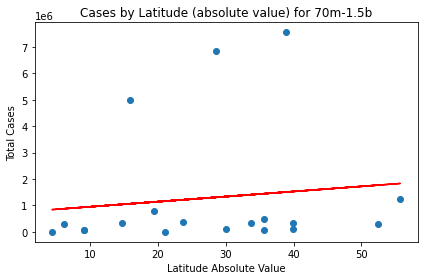

r-squared : 0.02
Correlation Coefficient : 0.12


In [17]:
plt.scatter(group_lat_abs, group_cases)
plt.xlabel('Latitude Absolute Value')
plt.ylabel('Total Cases')
plt.title(f'Cases by Latitude (absolute value) for {pop_range}')


slope, intercept, r, p, std_err = st.linregress(group_lat_abs, group_cases)
fit = slope * group_lat_abs + intercept
plt.plot(group_lat_abs,fit,color='r')

plt.tight_layout()
plt.show()

print(f"r-squared : {(round(r**2,2))}")
print(f"Correlation Coefficient : {round(st.pearsonr(group_lat_abs,group_cases)[0],2)}")

r-squared : 0.01
Correlation Coefficient : 0.08


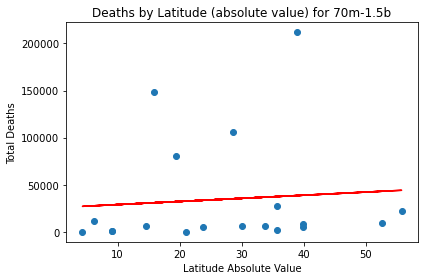

In [18]:
plt.scatter(group_lat_abs, group_deaths)
plt.xlabel('Latitude Absolute Value')
plt.ylabel('Total Deaths')
plt.title(f'Deaths by Latitude (absolute value) for {pop_range}')


slope, intercept, r, p, std_err = st.linregress(group_lat_abs, group_deaths)
fit = slope * group_lat_abs + intercept
plt.plot(group_lat_abs,fit,color='r')


plt.tight_layout()
plt.show()


print(f"r-squared : {(round(r**2,2))}")
print(f"Correlation Coefficient : {round(st.pearsonr(group_lat_abs,group_deaths)[0],2)}")

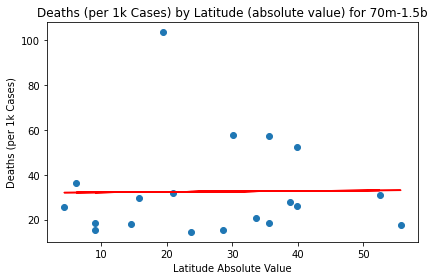

r-squared : 0.0
Correlation Coefficient : 0.01


In [22]:
plt.scatter(group_lat_abs, group_dp1k)
plt.xlabel('Latitude Absolute Value')
plt.ylabel('Deaths (per 1k Cases)')
plt.title(f'Deaths (per 1k Cases) by Latitude (absolute value) for {pop_range}')


slope, intercept, r, p, std_err = st.linregress(group_lat_abs, group_dp1k)
fit = slope * group_lat_abs + intercept
plt.plot(group_lat_abs,fit,color='r')


plt.tight_layout()
plt.show()

 
print(f"r-squared : {round(r**2,2)}")
print(f"Correlation Coefficient : {round(st.pearsonr(group_lat_abs,group_dp1k)[0],2)}")


In [20]:
pop_group = subset.groupby('Population Range')
avg_deaths = pop_group['Deaths per 1000 Cases'].mean()

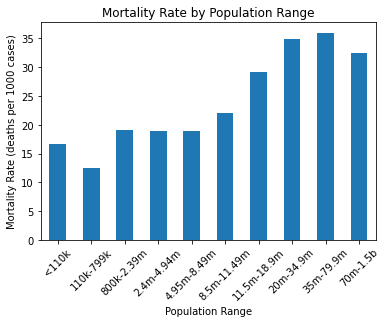

In [10]:
avg_deaths.plot(kind='bar')
plt.xlabel('Population Range')
plt.ylabel('Mortality Rate (deaths per 1000 cases)')
plt.title('Mortality Rate by Population Range')
plt.xticks(rotation=45)
plt.show()

In [ ]:
the biiiiiiig commented out section is basically what I am interested in turning
into a loop of some kind - it prolly wouldn't all need to be in there, but a for loop 
that runs that same code for each of the population ranges and stores the correlation coefficient 
for each in three lists (one each for cases, deaths, mortality rate) so we can then compare those.

For loops are kinda my nemises tho, so I have almsot no idea of how to do it. If you are looking 
for something new to work on, maybe give it a try?